### Probability Distributions

##### A probability distribution is a mathematical function that describes the likelihood of obtaining the possible values that a random variable can take. 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sns.set_theme(style="whitegrid")
print(f"PyTorch Version: {torch.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"SciPy Version: {scipy.__version__}")
print(f"Seaborn Version: {sns.__version__}")

PyTorch Version: 2.3.0+cu118
NumPy Version: 1.24.3
SciPy Version: 1.10.1
Seaborn Version: 0.13.2


#### Discrete Distributions

##### Bernoulli Distribution
- Represents a single trial with two outcomes (e.g., success/failure, 0/1).
- Parameter: p (probability of success, i.e., outcome 1).

In [3]:
probs_bernoulli = torch.tensor([0.7])
bernoulli_dist = torch.distributions.Bernoulli(probs=probs_bernoulli)

In [4]:
bernoulli_dist

Bernoulli(probs: tensor([0.7000]))

- Probability Mass Function (PMF) - P(X=k) 
- For Bernoulli, k can be 0 or 1.
- P(X=1) = p; P(X=0) = 1 - p

In [5]:
# We can use log_prob and then exp to get the probability.
k_values_bernoulli = torch.tensor([0., 1.])
pmf_bernoulli_log = bernoulli_dist.log_prob(k_values_bernoulli)
pmf_bernoulli_log

tensor([-1.2040, -0.3567])

In [6]:
pmf_bernoulli = torch.exp(pmf_bernoulli_log)
print(f"PMF for k=0: {pmf_bernoulli[0]:.2f}, k=1: {pmf_bernoulli[1]:.2f}")

PMF for k=0: 0.30, k=1: 0.70


- Cumulative Distribution Function (CDF) - P (X <= k)
- PyTorch distributions generally don't have a direct CDF method for discrete distributions (We can calculate it manually for simple cases or SciPy)

In [7]:
cdf_bernoulli_0 = pmf_bernoulli[0]
cdf_bernoulli_1 = pmf_bernoulli[0] + pmf_bernoulli[1]
print(f"CDF for k=0: {cdf_bernoulli_0:.2f}, k=1: {cdf_bernoulli_1:.2f}")

CDF for k=0: 0.30, k=1: 1.00


In [8]:
n_samples = 10
samples_bernoulli = bernoulli_dist.sample(sample_shape=torch.Size([n_samples]))
samples_bernoulli

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [9]:
samples_bernoulli.squeeze()

tensor([1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

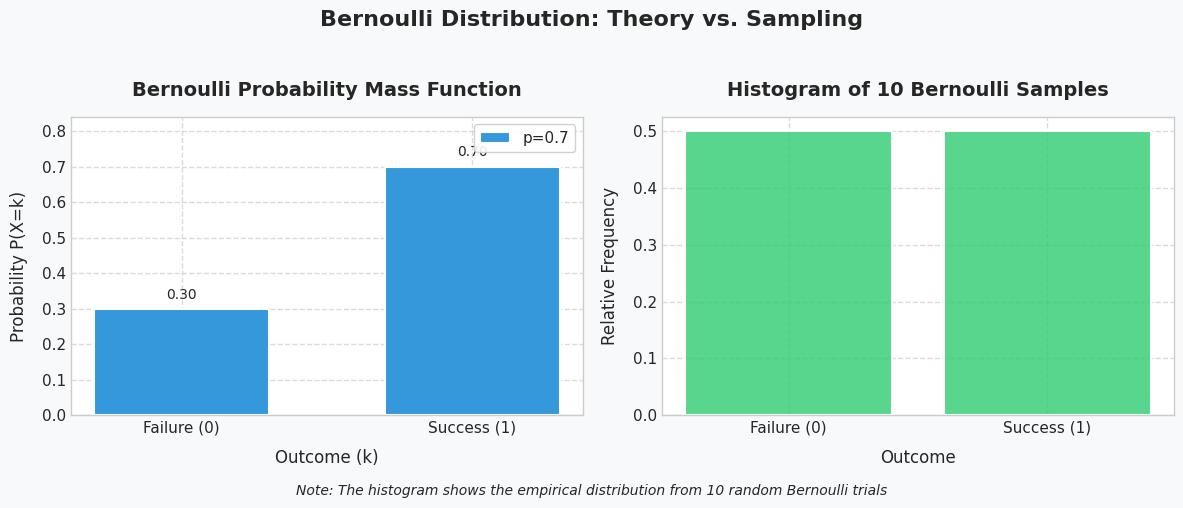

In [59]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(k_values_bernoulli.numpy(), pmf_bernoulli.numpy(), color='skyblue', label=f'p={probs_bernoulli.item():.1f}')
plt.title('Bernoulli PMF')
plt.xlabel('Outcome (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(samples_bernoulli.squeeze().numpy(), discrete=True, stat="probability", shrink=0.8)
plt.title(f'Histogram of {n_samples} Bernoulli Samples')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

##### Binomial Distribution
- Represents the number of successes in a fixed number 'n' (total_count) of independent Bernoulli trials.
- Parameters: n (total_count), p (probability of success in each trial).

In [11]:
total_count_binomial = 10
probs_binomial = torch.tensor([0.5])
binomial_dist = torch.distributions.Binomial(total_count=total_count_binomial, probs=probs_binomial)
binomial_dist

Binomial(total_count: tensor([10.]), probs: tensor([0.5000]))

In [12]:
# PMF - P(X=k) = C(n, k) * p^k * (1-p)^(n-k)
k_values_binomial = torch.arange(0, total_count_binomial + 1, dtype=torch.float32)
pmf_binomial_log = binomial_dist.log_prob(k_values_binomial)
pmf_binomial = torch.exp(pmf_binomial_log)
pmf_binomial

tensor([0.0010, 0.0098, 0.0439, 0.1172, 0.2051, 0.2461, 0.2051, 0.1172, 0.0439,
        0.0098, 0.0010])

In [13]:
n_samples_binom = 1000
samples_binomial = binomial_dist.sample(sample_shape=torch.Size([n_samples_binom]))

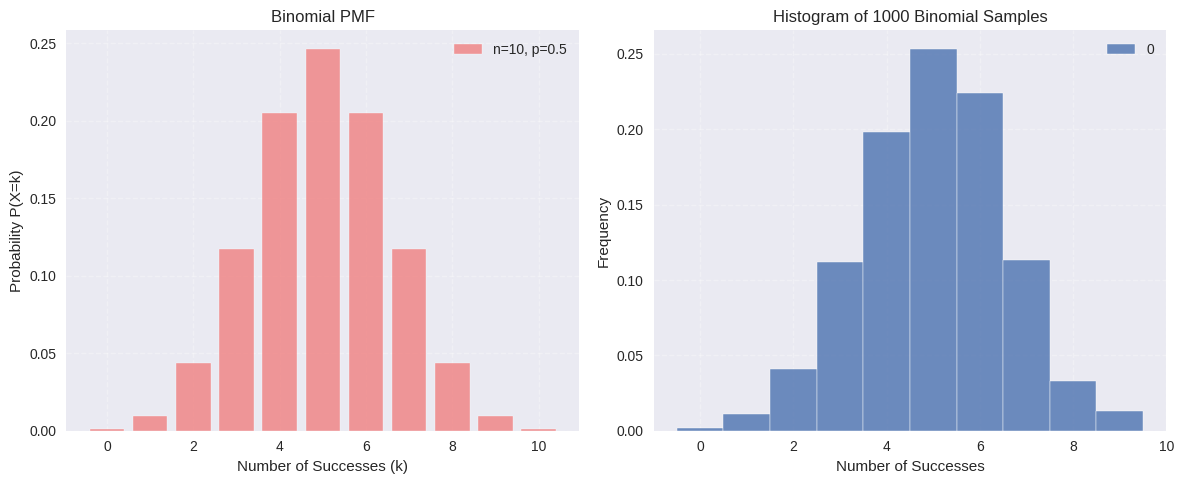

In [61]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(k_values_binomial.numpy(), pmf_binomial.numpy(), 
       color='lightcoral', 
       alpha=0.8,
       label=f'n={total_count_binomial}, p={probs_binomial.item():.1f}')
       
plt.title('Binomial PMF')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(samples_binomial.numpy(), 
            discrete=True, 
            stat="probability", 
            bins=total_count_binomial+1,
            color='lightcoral',
            alpha=0.8)
            
plt.title(f'Histogram of {n_samples_binom} Binomial Samples')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

##### categorical Distribution (Generalized Bernoulli)
- Represents a single trial with K possible outcomes (categories).
- Parameter: probs (a vector of K probabilities, must sum to 1).

In [15]:
# Probabilities for K=3 categories (e.g., rolling a loaded die)
probs_categorical = torch.tensor([0.2, 0.5, 0.3])
categorical_dist = torch.distributions.Categorical(probs=probs_categorical)
categorical_dist

Categorical(probs: torch.Size([3]))

In [16]:
# PMf - P(X=k_i) = p_i
k_values_categorical = torch.arange(len(probs_categorical))
k_values_categorical

tensor([0, 1, 2])

In [17]:
pmf_categorical_log = categorical_dist.log_prob(k_values_categorical.float())
pmf_categorical_log

tensor([-1.6094, -0.6931, -1.2040])

In [18]:
pmf_categorical = torch.exp(pmf_categorical_log)
k_values_categorical.numpy(), pmf_categorical.numpy()

(array([0, 1, 2]), array([0.19999999, 0.5       , 0.29999998], dtype=float32))

In [19]:
n_samples_cat = 1000
samples_categorical = categorical_dist.sample(sample_shape=torch.Size([n_samples_cat]))

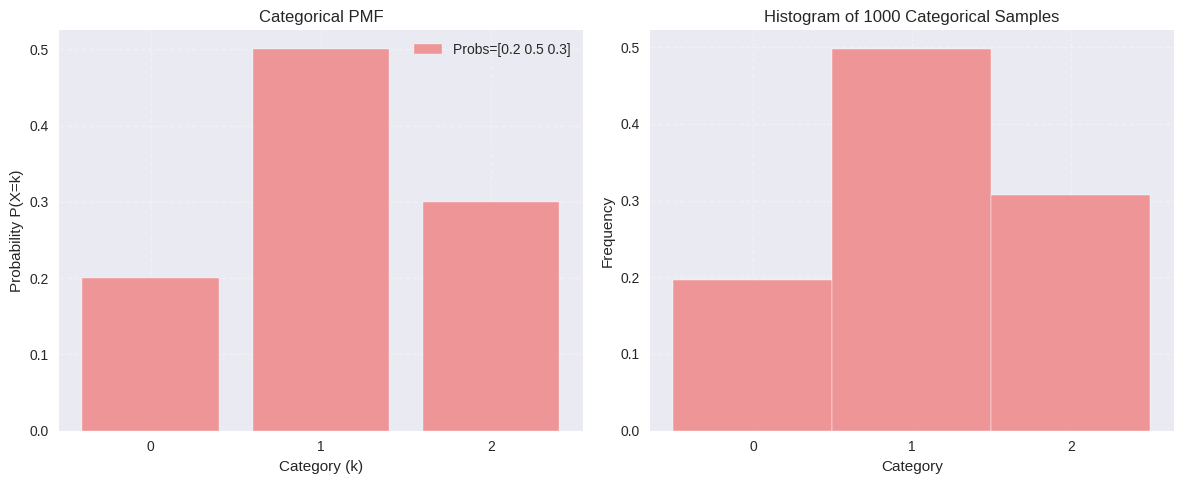

In [64]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(k_values_categorical.numpy(), pmf_categorical.numpy(), 
       color='lightcoral', 
       alpha=0.8,
       label=f'Probs={probs_categorical.numpy()}')
       
plt.title('Categorical PMF')
plt.xlabel('Category (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(k_values_categorical.numpy())
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(samples_categorical.numpy(), 
            discrete=True, 
            stat="probability", 
            bins=len(probs_categorical),
            color='lightcoral',
            alpha=0.8)
            
plt.title(f'Histogram of {n_samples_cat} Categorical Samples')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(k_values_categorical.numpy())
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

#### Continuous Distributions

##### Uniform Distribution
- All values within a given range [a,b] are equally likely.
- Parameters: a (low), b (high)

In [21]:
low_uniform = torch.tensor(0.0)
high_uniform = torch.tensor(5.0)
uniform_dist_pt = torch.distributions.Uniform(low=low_uniform, high=high_uniform)
uniform_dist_pt

Uniform(low: 0.0, high: 5.0)

In [22]:
# Probability Density Function (PDF) - f(x)
# f(x) = 1 / (b - a) for a <= x <= b, and 0 otherwise.
x_values_uniform = torch.linspace(low_uniform - 1, high_uniform + 1, 500)
x_values_uniform

tensor([-1.0000e+00, -9.8597e-01, -9.7194e-01, -9.5792e-01, -9.4389e-01,
        -9.2986e-01, -9.1583e-01, -9.0180e-01, -8.8778e-01, -8.7375e-01,
        -8.5972e-01, -8.4569e-01, -8.3166e-01, -8.1764e-01, -8.0361e-01,
        -7.8958e-01, -7.7555e-01, -7.6152e-01, -7.4749e-01, -7.3347e-01,
        -7.1944e-01, -7.0541e-01, -6.9138e-01, -6.7735e-01, -6.6333e-01,
        -6.4930e-01, -6.3527e-01, -6.2124e-01, -6.0721e-01, -5.9319e-01,
        -5.7916e-01, -5.6513e-01, -5.5110e-01, -5.3707e-01, -5.2305e-01,
        -5.0902e-01, -4.9499e-01, -4.8096e-01, -4.6693e-01, -4.5291e-01,
        -4.3888e-01, -4.2485e-01, -4.1082e-01, -3.9679e-01, -3.8277e-01,
        -3.6874e-01, -3.5471e-01, -3.4068e-01, -3.2665e-01, -3.1263e-01,
        -2.9860e-01, -2.8457e-01, -2.7054e-01, -2.5651e-01, -2.4248e-01,
        -2.2846e-01, -2.1443e-01, -2.0040e-01, -1.8637e-01, -1.7234e-01,
        -1.5832e-01, -1.4429e-01, -1.3026e-01, -1.1623e-01, -1.0220e-01,
        -8.8176e-02, -7.4148e-02, -6.0120e-02, -4.6

In [23]:
# Calculate PDF values manually to avoid errors
pdf_uniform_pt = torch.zeros_like(x_values_uniform)
valid_indices = (x_values_uniform >= low_uniform) & (x_values_uniform <= high_uniform)
valid_x = x_values_uniform[valid_indices]
valid_x

tensor([0.0100, 0.0240, 0.0381, 0.0521, 0.0661, 0.0802, 0.0942, 0.1082, 0.1222,
        0.1363, 0.1503, 0.1643, 0.1784, 0.1924, 0.2064, 0.2204, 0.2345, 0.2485,
        0.2625, 0.2766, 0.2906, 0.3046, 0.3186, 0.3327, 0.3467, 0.3607, 0.3747,
        0.3888, 0.4028, 0.4168, 0.4309, 0.4449, 0.4589, 0.4729, 0.4870, 0.5010,
        0.5150, 0.5291, 0.5431, 0.5571, 0.5711, 0.5852, 0.5992, 0.6132, 0.6273,
        0.6413, 0.6553, 0.6693, 0.6834, 0.6974, 0.7114, 0.7255, 0.7395, 0.7535,
        0.7675, 0.7816, 0.7956, 0.8096, 0.8236, 0.8377, 0.8517, 0.8657, 0.8798,
        0.8938, 0.9078, 0.9218, 0.9359, 0.9499, 0.9639, 0.9780, 0.9920, 1.0060,
        1.0200, 1.0341, 1.0481, 1.0621, 1.0762, 1.0902, 1.1042, 1.1182, 1.1323,
        1.1463, 1.1603, 1.1743, 1.1884, 1.2024, 1.2164, 1.2305, 1.2445, 1.2585,
        1.2725, 1.2866, 1.3006, 1.3146, 1.3287, 1.3427, 1.3567, 1.3707, 1.3848,
        1.3988, 1.4128, 1.4269, 1.4409, 1.4549, 1.4689, 1.4830, 1.4970, 1.5110,
        1.5251, 1.5391, 1.5531, 1.5671, 

In [24]:
# For valid x values within range, compute log_prob and then exp
if valid_x.numel() > 0:  # Check if there are any valid values
    pdf_uniform_pt[valid_indices] = torch.exp(uniform_dist_pt.log_prob(valid_x))

In [25]:
cdf_uniform_pt = torch.zeros_like(x_values_uniform)
cdf_uniform_pt[x_values_uniform < low_uniform] = 0.0
cdf_uniform_pt[x_values_uniform > high_uniform] = 1.0
mid_indices = (x_values_uniform >= low_uniform) & (x_values_uniform <= high_uniform)
cdf_uniform_pt[mid_indices] = (x_values_uniform[mid_indices] - low_uniform) / (high_uniform - low_uniform)

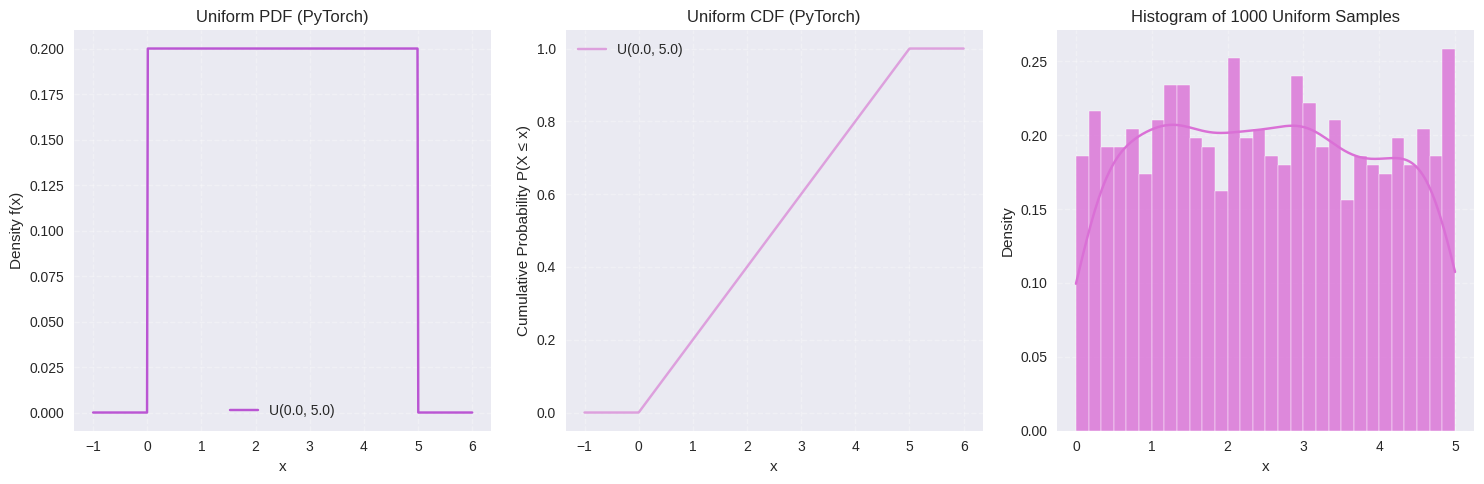

In [65]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 5))

# Plot PDF
plt.subplot(1, 3, 1)
plt.plot(x_values_uniform.numpy(), pdf_uniform_pt.numpy(), 
         color='mediumorchid', 
         label=f'U({low_uniform.item()}, {high_uniform.item()})')
plt.title('Uniform PDF (PyTorch)')
plt.xlabel('x')
plt.ylabel('Density f(x)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

# Plot CDF
plt.subplot(1, 3, 2)
plt.plot(x_values_uniform.numpy(), cdf_uniform_pt.numpy(), 
         color='plum', 
         label=f'U({low_uniform.item()}, {high_uniform.item()})')
plt.title('Uniform CDF (PyTorch)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability P(X ≤ x)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

# Histogram of samples
plt.subplot(1, 3, 3)
sns.histplot(samples_uniform_pt.squeeze().numpy(), 
             stat="density", 
             bins=30, 
             kde=True,
             color='orchid', 
             alpha=0.8)
plt.title(f'Histogram of {n_samples_uniform} Uniform Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


##### Normal (Gaussian) Distribution

In [27]:
mean_normal = torch.tensor(0.0)
std_normal = torch.tensor(1.0)
normal_dist_pt = torch.distributions.Normal(loc=mean_normal, scale=std_normal)
normal_dist_pt

Normal(loc: 0.0, scale: 1.0)

In [34]:
# For better CDF plotting, let's also use scipy.stats
norm_scipy = scipy.stats.norm(loc=mean_normal, scale=std_normal.item())

In [35]:
# PDF - f(x) = (1 / (sigma * sqrt(2*pi))) * exp(-0.5 * ((x - mu)/sigma)^2)
x_values_normal = torch.linspace(mean_normal - 4*std_normal, mean_normal + 4*std_normal, 500)
pdf_normal_log_pt = normal_dist_pt.log_prob(x_values_normal)
pdf_normal_pt = torch.exp(pdf_normal_log_pt)
pdf_normal_scipy = norm_scipy.pdf(x_values_normal.numpy())

In [36]:
# CDF - P(X <= x)
cdf_normal_pt = normal_dist_pt.cdf(x_values_normal)
cdf_normal_scipy = norm_scipy.cdf(x_values_normal.numpy())

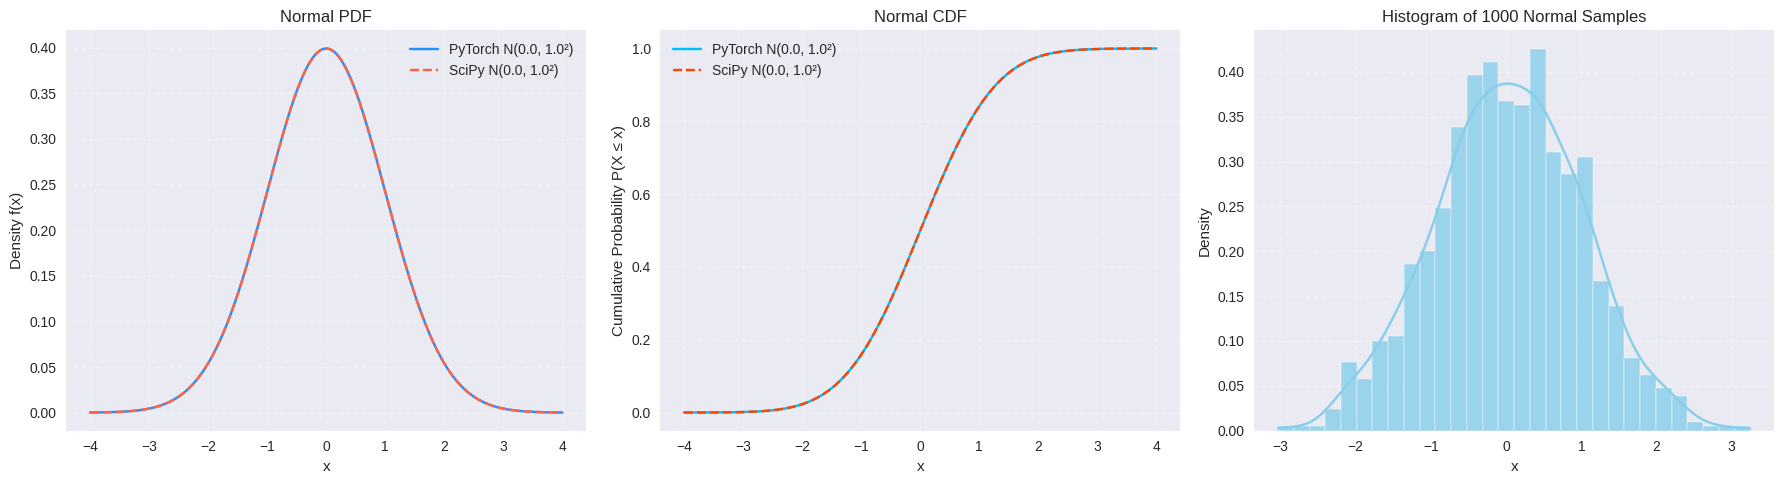

In [66]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(18, 5))

# Plot PDF
plt.subplot(1, 3, 1)
plt.plot(x_values_normal.numpy(), pdf_normal_pt.numpy(), 
         color='dodgerblue', 
         label=f'PyTorch N({mean_normal.item()}, {std_normal.item()}²)')
plt.plot(x_values_normal.numpy(), pdf_normal_scipy, 
         color='tomato', linestyle='--', 
         label=f'SciPy N({mean_normal.item()}, {std_normal.item()}²)')
plt.title('Normal PDF')
plt.xlabel('x')
plt.ylabel('Density f(x)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

# Plot CDF
plt.subplot(1, 3, 2)
plt.plot(x_values_normal.numpy(), cdf_normal_pt.numpy(), 
         color='deepskyblue', 
         label=f'PyTorch N({mean_normal.item()}, {std_normal.item()}²)')
plt.plot(x_values_normal.numpy(), cdf_normal_scipy, 
         color='orangered', linestyle='--', 
         label=f'SciPy N({mean_normal.item()}, {std_normal.item()}²)')
plt.title('Normal CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability P(X ≤ x)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

# Histogram of samples
plt.subplot(1, 3, 3)
sns.histplot(samples_normal_pt.squeeze().numpy(), 
             stat="density", 
             bins=30, 
             kde=True, 
             color='skyblue', 
             alpha=0.8)
plt.title(f'Histogram of {n_samples_normal} Normal Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

#### Bayes' Theorem

Bayes' Theorem describes how to update the probability of a hypothesis (H) given new evidence (E).</br>
</br>
Formula: P(H|E) = [P(E|H) * P(H)] / P(E) </br>
</br>
where, 
- P(H|E): Posterior probability - probability of H after observing E.
- P(E|H): Likelihood - probability of observing E if H is true.
- P(H): Prior probability - initial probability of H before observing E.
- P(E): Evidence (or Marginal Likelihood) - total probability of observing E.
</br>
P(E) = P(E|H) * P(H) + P(E|~H) * P(~H)  (for binary H) </br>
     = Σ P(E|H_i) * P(H_i) (for multiple hypotheses H_i)

##### Example : Medical Test
- H: Patient has the disease.
- E: Patient tests positive
</br></br>
Prior probability of having the disease </br>
P(H) = 0.01 (1% of the population has the disease)

In [38]:
P_H = torch.tensor(0.01)
P_not_H = 1 - P_H
P_not_H

tensor(0.9900)

Likelihoods: </br></br>
P(E|H) = Probability of testing positive if patient does NOT have the disease (FP) </br>
P(E|~H) = 0.05 (5% of healthy people test positive) 

In [39]:
P_E_given_H = torch.tensor(0.99)

P(E|~H): Probability of testing positive if patient does NOT have the disease (False Positive Rate) </br> </br>
P(E|~H) = 0.05 (5% of healthy people test positive)

In [42]:
P_E_given_not_H = torch.tensor(0.05)

In [43]:
# Calculate P(E) - the evidence (overall probability of testing positive)
# P(E) = P(E|H) * P(H) + P(E|~H) * P(~H)
P_E = (P_E_given_H * P_H) + (P_E_given_not_H * P_not_H)
print(f"P(H) - Prior (Patient has disease): {P_H.item():.4f}")
print(f"P(E|H) - Likelihood (Test positive | Has disease): {P_E_given_H.item():.4f}")
print(f"P(E|~H) - Likelihood (Test positive | No disease): {P_E_given_not_H.item():.4f}")
print(f"P(E) - Evidence (Overall prob. of testing positive): {P_E.item():.4f}")

P(H) - Prior (Patient has disease): 0.0100
P(E|H) - Likelihood (Test positive | Has disease): 0.9900
P(E|~H) - Likelihood (Test positive | No disease): 0.0500
P(E) - Evidence (Overall prob. of testing positive): 0.0594


In [44]:
# Calculate P(H|E) - the posterior probability (Patient has disease | Tests positive)
# P(H|E) = [P(E|H) * P(H)] / P(E)
P_H_given_E = (P_E_given_H * P_H) / P_E
print(f"\nP(H|E) - Posterior (Patient has disease | Tests positive): {P_H_given_E.item():.4f}")


P(H|E) - Posterior (Patient has disease | Tests positive): 0.1667


**Interpretation**: Even with a positive test, the probability of actually having the disease if ~16.7%, due to the low prior probability (rarity of the disease) and the false positive rate. This is common illustration of how Bayes' theorem helps in reasoning under uncertainty.

#### Sampling

Sampling is the process of selecting a subset of individuals or items from within a statistical population to estimate characteristics of the whole population. In ML, we sample from distributions or from datasets.

##### *Sampling Techniques*

##### Sampling from Distributions

In [45]:
samples_normal_pt = normal_dist_pt.sample(sample_shape=torch.Size([n_samples_normal]))

##### Simple Random Sampling from a Dataset 
- Each element has an equal chance of being selected.

In [46]:
# Create a dummy dataset (PyTorch tensor)
population_data = torch.arange(1, 101, dtype=torch.float32)
population_data.shape

torch.Size([100])

In [47]:
# Sample 10 items without replacement
sample_size = 10

In [48]:
# Method 1: Using torch.randperm to get random indices
indices = torch.randperm(population_data.shape[0])[:sample_size]
indices

tensor([52, 41, 18, 37, 24, 80, 92,  7, 44, 27])

In [49]:
simple_random_sample_1 = population_data[indices]
simple_random_sample_1

tensor([53., 42., 19., 38., 25., 81., 93.,  8., 45., 28.])

In [50]:
# Method 2: using np.random.choice 
indices_np = np.random.choice(population_data.shape[0], size=sample_size, replace=False)
indices_np

array([92, 51, 73, 56, 35, 63, 25, 69,  2, 60])

In [51]:
simple_random_sample_2 = population_data[torch.from_numpy(indices_np)]
simple_random_sample_2

tensor([93., 52., 74., 57., 36., 64., 26., 70.,  3., 61.])

##### Stratified Sampling (Conceptual)

The population is divided into subgroups (strata), and random samples are taken from each stratum, often proportionally. This ensures representation from all subgroups. Example: Sampling users, ensuring you get representation from different age groups. PyTorch doesn't have a direct stratified sampling function for general tensors. </br></br>
For datasets in ML, libraries like scikit-learn (`sklearn.model_selection.StratifiedShuffleSplit` or `StratifiedKFold`) are commonly used for this, especially when creating train/test splits for classification tasks to maintain class proporitions.

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

In [53]:
X_strat = np.arange(20).reshape(10,2)
y_strat = np.array([0,0,0,0,1,1,1,1,1,1])

In [56]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
sss

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=None)

In [58]:
for train_index, test_index in sss.split(X_strat, y_strat):
    X_train, X_test = X_strat[train_index], X_strat[test_index]
    y_train, y_test = y_strat[train_index], y_strat[test_index]
    print(f"\nStratified Sampling (sklearn example):")
    print(f"  Train indices: {train_index}, y_train: {y_train}")
    print(f"  Test indices: {test_index}, y_test: {y_test}")
    print(f"  Proportion of class 1 in y_train: {np.mean(y_train):.2f}")
    print(f"  Proportion of class 1 in y_test: {np.mean(y_test):.2f}")


Stratified Sampling (sklearn example):
  Train indices: [5 3 1 7 9 4 0], y_train: [1 0 0 1 1 1 0]
  Test indices: [2 8 6], y_test: [0 1 1]
  Proportion of class 1 in y_train: 0.57
  Proportion of class 1 in y_test: 0.67
